A program that reads and processes images for a Gradient Boosting Classifier to classify as images as good, blacked-out, saturated, or blurry.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Set path to csv file with names and labels of images
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images.csv')
# Set path to training/test image folders
paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/*MEDIA/'
# Fit model X samples y classes
train_images, image_list = fit_models.read_images(paths)
y = np.array(df_train['Label'])
y = df_train['Label'].values
# Train model with 60% training images and 40% testing images
X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

print(df_train.head())
print(X_train.shape)
print(y_train)

(431, 327680)
  Image Date     MEDIA Image_Name  Label Unnamed: 4
0  2/16/2019  100MEDIA   DJI_0001      2        NaN
1  2/16/2019  100MEDIA   DJI_0002      2        NaN
2  2/16/2019  100MEDIA   DJI_0003      2        NaN
3  2/16/2019  100MEDIA   DJI_0004      2        NaN
4  2/16/2019  100MEDIA   DJI_0005      2        NaN
(258, 327680)
[0 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 3 2 0 0 0
 0 2 3 0 2 0 3 0 0 2 0 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0
 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 3 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0
 3 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 3 0 2 0 0 0 0
 1 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 0 0 0 0 0 0 1 2 0 0 0 0 0 0]


In [3]:
# Apply gradient boosting classifier
model = GradientBoostingClassifier()
model_boosting, probabilities, y_pred = fit_models.supervised_models(model, X_train, y_train, X_test, y_test)
print(probabilities)

             precision    recall  f1-score   support

          0       0.84      0.94      0.89       133
          1       0.86      0.75      0.80         8
          2       0.47      0.50      0.48        14
          3       0.00      0.00      0.00        18

avg / total       0.72      0.80      0.76       173

[6.45850567e-06 1.53453411e-05 3.02396181e-05 1.81597330e-05
 4.12815337e-05 1.53453411e-05 1.53453411e-05 2.21804461e-01
 6.03425875e-05 1.53453411e-05 2.34310499e-05 1.53447896e-05
 3.36174159e-03 1.53453411e-05 1.53439526e-05 1.53453411e-05
 1.49579748e-05 4.89724184e-05 1.52519141e-05 1.53453412e-05
 7.35952307e-05 1.53453411e-05 1.53453411e-05 1.53453411e-05
 1.53453411e-05 9.57250185e-05 4.82886338e-05 1.53452442e-05
 1.53453411e-05 1.53453411e-05 1.65258050e-05 1.53453411e-05
 7.51380322e-05 1.53453411e-05 9.99314204e-01 1.53453411e-05
 3.79870383e-02 1.44925651e-04 1.53451989e-05 9.97250339e-01
 1.53453411e-05 1.53450843e-05 1.53453411e-05 1.53453411e-05
 1.53453

In [4]:
# Check confusion matrix
print(confusion_matrix(y_test, y_pred))

[[125   0   6   2]
 [  2   6   0   0]
 [  7   0   7   0]
 [ 15   1   2   0]]


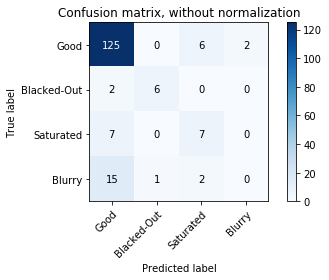

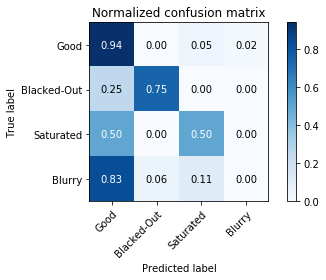

In [5]:
# Apply labels to classes
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']
# Set printing options
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()